In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math

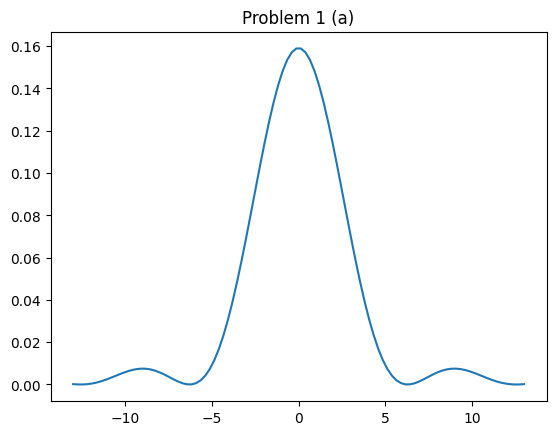

In [89]:
# Problem 1 (a)
def xc(t):
  t = np.array(t)
  return np.where(t != 0., 
                  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)), 
                  1. / (2 * np.pi))
  # return 2 * np.pi * np.sin(t / 2) ** 2 / (np.pi ** 2 * t ** 2)

def Xc(w):
  w = np.array(w)
  return np.where(np.abs(w) <= 1.,
                  1. - np.abs(w),
                  0.)

t = np.linspace(-13, 13, 100)
plt.plot(t, xc(t))
plt.title("Problem 1 (a)")
plt.show()


In [90]:
# Problem 1 (b)

def sample(x, T):
  def x1(n):
    return x(np.array(n * T))
  return x1

x1 = sample(xc, 1)
x2 = sample(xc, 5)

/var/folders/24/fl4p3hx9297by7rlfvn4myh00000gn/T/ipykernel_3276/4140963447.py:5: RuntimeWarning: invalid value encountered in divide
  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)),


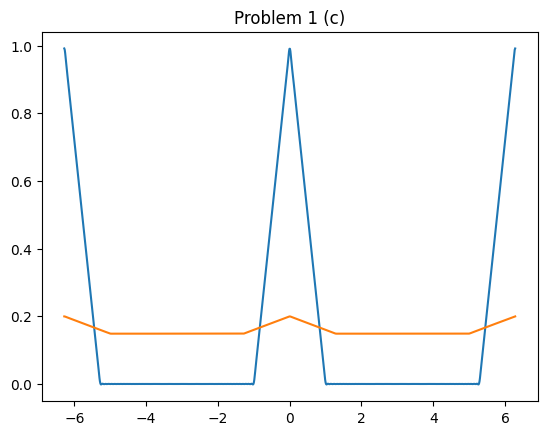

In [ ]:
# Problem 1 (c)
def approx_dft(x):
  @np.vectorize
  def X(w):
    n = np.arange(-73, 74, dtype=float)
    return np.sum(x(n) * np.e ** (-1j * n * w))
  return X

X1 = approx_dft(x1)
X2 = approx_dft(x2)

w = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(w, X1(w))
plt.plot(w, X2(w))
plt.title("Problem 1 (c)")
plt.show()

In [ ]:
# just to check if approximated dfts match expected in (-pi, pi)
w = np.linspace(-np.pi, np.pi, 1000)
plt.plot(w, X1(w))
plt.plot(w, Xc(w))
# plt.plot(w, X2(w))
# plt.plot(w, 1/5 * Xc(w/5))
plt.show()

/var/folders/24/fl4p3hx9297by7rlfvn4myh00000gn/T/ipykernel_3276/4140963447.py:5: RuntimeWarning: invalid value encountered in divide
  2 * (np.sin(t / 2) ** 2) / (np.pi * (t ** 2)),


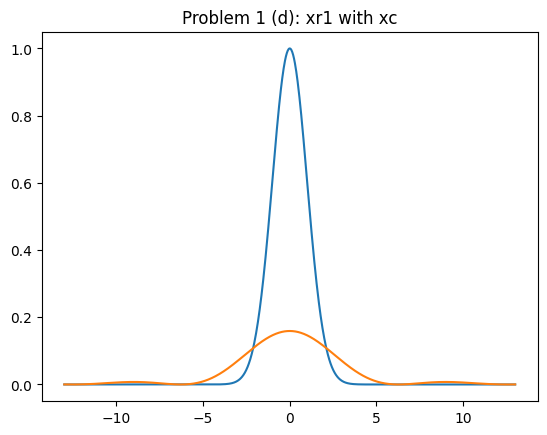

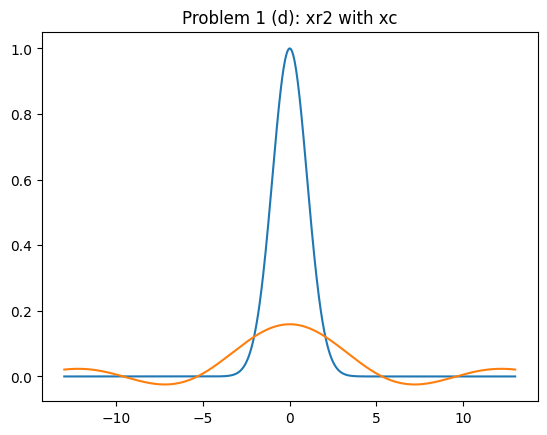

In [ ]:
# Problem 1 (d)
def interpolate(x, T):
  """x is a sample"""
  @np.vectorize 
  def xr(t):
    n = math.floor(t)
    return x(n) + (t - n * T) / T * (x(n + 1) - x(n))
  return xr

def sinc_interpolate(x, T):
  """x is a sample"""

  @np.vectorize
  def xr(t):
    n = np.arange(-73, 74, dtype="float")
    fraction = np.sinc(1/T * (t - n * T))
    return np.sum(x(n) * fraction)
  return xr
  



xr1 = interpolate(x1, 1)
xr2 = interpolate(x2, 5)

xr1 = sinc_interpolate(x1, 1)
xr2 = sinc_interpolate(x2, 5)

t = np.linspace(-13, 13, 1000)
plt.plot(t, xc(t))
plt.plot(t, xr1(t))
plt.title("Problem 1 (d): xr1 with xc")
plt.show()

plt.plot(t, xc(t))
plt.plot(t, xr2(t))
plt.title("Problem 1 (d): xr2 with xc")
plt.show()




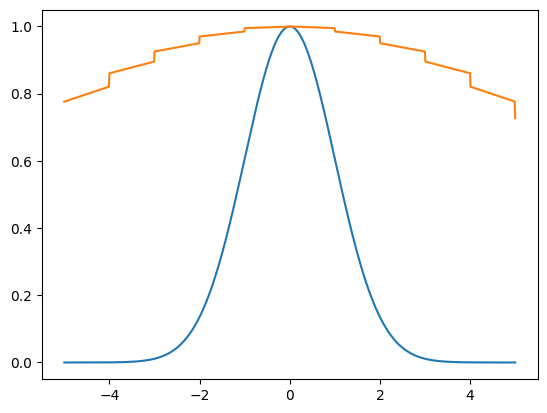

In [ ]:
# Problem 2
def xc(t):
  t = np.array(t)
  return np.e ** (-(t ** 2) / 2)
xr = interpolate(sample(xc, 0.05), 0.05)

t = np.linspace(-5, 5, 1000)
plt.plot(t, xc(t))
plt.plot(t, xr(t))
plt.show()
